In [1]:
import torch as pt
import torch 
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [111]:
path_db = '../data/TUDataset'
dataset_tud = TUDataset(root=path_db, name='MUTAG')

In [112]:
data = dataset_tud[12]  # Get the first graph object.

In [114]:
type(dataset_tud)

torch_geometric.datasets.tu_dataset.TUDataset

In [38]:
data    # obtain dimensions 

Data(edge_index=[2, 50], x=[22, 7], edge_attr=[50, 4], y=[1])

In [54]:
data.edge_index.T         # obtain every undirected connections

tensor([[ 0,  1],
        [ 0,  5],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 3,  2],
        [ 3,  4],
        [ 3, 12],
        [ 4,  3],
        [ 4,  5],
        [ 4,  6],
        [ 5,  0],
        [ 5,  4],
        [ 6,  4],
        [ 6,  7],
        [ 6, 11],
        [ 7,  6],
        [ 7,  8],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 19],
        [10,  9],
        [10, 11],
        [10, 15],
        [11,  6],
        [11, 10],
        [11, 12],
        [12,  3],
        [12, 11],
        [12, 13],
        [13, 12],
        [13, 14],
        [14, 13],
        [14, 15],
        [14, 16],
        [15, 10],
        [15, 14],
        [16, 14],
        [16, 17],
        [16, 18],
        [17, 16],
        [18, 16],
        [19,  9],
        [19, 20],
        [19, 21],
        [20, 19],
        [21, 19]])

In [39]:
data.x    # obtain node labels

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]])

In [40]:
data.edge_attr       # obtain edges labels 

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1.,

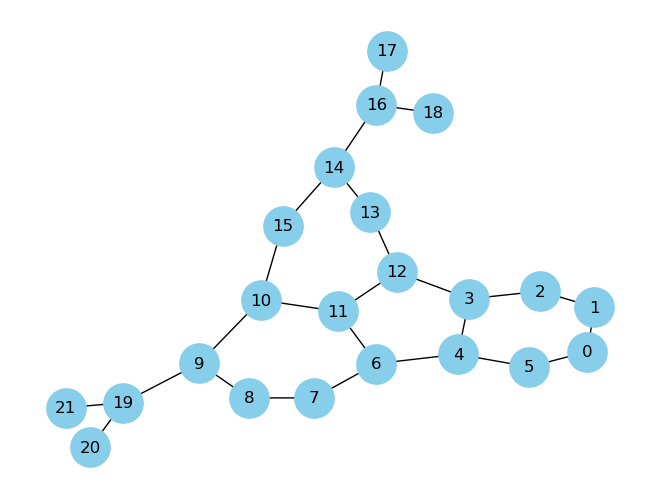

In [21]:
x = data.x.numpy()  # Assuming node features are stored in 'x'
edge_index = data.edge_index.numpy()  # Assuming edge information is in 'edge_index'
G = nx.Graph()

# Add nodes with features
for i in range(x.shape[0]):
    G.add_node(i, features=x[i])
# Add edges
for j in range(edge_index.shape[1]):
    G.add_edge(edge_index[0, j], edge_index[1, j])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, cmap=plt.cm.Blues)
plt.show()

## HCP Data using Simeon preproc

In [2]:
def create_fc_matrices(scan, window_size=30, step_size=30):
    """
    Create functional connectivity matrices using a sliding window approach.
    """
    n_timepoints = scan.shape[1]
    fc_matrices = []

    for start in range(0, n_timepoints - window_size + 1, step_size):
        window = scan[:, start:start + window_size]
        correlation_matrix = np.corrcoef(window)
        fc_matrices.append(correlation_matrix)

    return fc_matrices


def threshold_fc_matrix(fc_matrix, percentile=5):
    """
    Threshold the FC matrix to keep only the top percentile connections.
    """
    threshold = np.percentile(fc_matrix[np.tril_indices_from(fc_matrix, k=-1)], 100 - percentile)   
    graph = (fc_matrix > threshold).astype(int)
    np.fill_diagonal(graph, 0)  # remove self-edges
    return graph


def create_networkx_graph(matrix):
    G = nx.Graph(matrix)
    return G


def convert_to_pyg_graph(nx_graph, label):
    graph = nx.Graph(nx_graph)
    edges = torch.tensor(list(graph.edges), dtype=torch.long).t().contiguous()
    x = torch.tensor(np.identity(graph.number_of_nodes()), dtype=torch.float)
    y = torch.tensor([label], dtype=torch.long)
    return Data(x=x, edge_index=edges, y=y)

In [12]:
data_path = '../data/hcp/raw'
file_name = '100206_0.npy'
file_path = os.path.join(data_path, file_name)
print('FILE_PATH: ', file_path)
time_series_data = np.load(file_path)[:, :490]
label = int(os.path.basename(file_path).split('_')[-1].split('.')[0])
fc_matrices = create_fc_matrices(time_series_data, 490)
graphs = [threshold_fc_matrix(fc) for fc in fc_matrices] 
graph = graphs[0]
graph_nx = convert_to_pyg_graph(graph, label)




FILE_PATH:  ../data/hcp/raw/100206_0.npy


In [127]:
batch_size = 1
lr = 0.003
n_episodes = 2000
device = 'cpu'
n_itcn_layers = 3
n_gru_layers = 1
n_neurons = 360
tau = 0.1
T = 100
len_window = 2
kernel_list = [3, 5, 7]
stride = 5
itcn_d = 9
ebd_d = 3
gcn_d = 5
n_classes = 1
t_repetition = (T - 2*(len_window - 1) - 1)//(stride+1)

def get_x_split(x: pt.Tensor) -> pt.Tensor:
    x_split = pt.stack([x[:, :, t*stride:t*stride+len_window] for t in range(t_repetition)], 1)
    return x_split.float()

def get_node_features(x_split: pt.Tensor) -> pt.Tensor:
    x_split_avg = pt.mean(x_split, -1, keepdim=True)
    x_split_std = pt.std(x_split, -1, keepdim=True)
    x_split_cov = pt.matmul(x_split - x_split_avg, pt.transpose(x_split - x_split_avg, 2, 3))
    node_features = x_split_cov/pt.matmul(x_split_std, pt.transpose(x_split_std, 2, 3))
    return node_features

def get_coo(adjacency_matrix: pt.Tensor) -> pt.Tensor:
    i = 0
    edge_indices = pt.nonzero(adjacency_matrix > 0, as_tuple=False).T
    edge_index_batch = pt.clone(edge_indices[1:3, :])
    for t in range(len(edge_indices[0])):
        if i < edge_indices[0][t]:
            i = i + 1
            n_nodes = max(edge_indices[1][t-1], edge_indices[2][t-1])+1
            edge_index_batch[0][t:] = edge_index_batch[0][t:] + n_nodes
            edge_index_batch[1][t:] = edge_index_batch[1][t:] + n_nodes
    edge_attr_batch = adjacency_matrix[adjacency_matrix > 0].unsqueeze(-1)
    batch = edge_indices[0]
    return edge_index_batch, edge_attr_batch, batch

def clip_end(x: pt.Tensor, i: int, dilation) -> pt.Tensor:
    padding = (kernel_list[i]-1)*dilation
    x = x[:, :, :-padding].contiguous()
    return x

def inceptionTC(x_split: pt.Tensor, dilation):
    t_conv_0 = pt.nn.Conv1d(itcn_d, itcn_d//3, kernel_list[0], dilation=dilation, padding=(kernel_list[0]-1)*dilation)
    t_conv_1 = pt.nn.Conv1d(itcn_d, itcn_d//3, kernel_list[1], dilation=dilation, padding=(kernel_list[1]-1)*dilation)
    t_conv_2 = pt.nn.Conv1d(itcn_d, itcn_d//3, kernel_list[2], dilation=dilation, padding=(kernel_list[2]-1)*dilation)
    bn = pt.nn.BatchNorm1d(itcn_d)
    x_cat = [clip_end(t_conv_0(x_split), 0, dilation), 
             clip_end(t_conv_1(x_split), 1, dilation), 
             clip_end(t_conv_2(x_split), 2, dilation)]
    x_cat = pt.cat(x_cat, 1)
    x_out = pt.relu(bn(x_cat))
    return x_out


def itcn(x_split: pt.Tensor):
    x_split = x_split.reshape(batch_size*n_neurons, itcn_d, t_repetition)
    x_split = inceptionTC(x_split, 2)
    x_split = inceptionTC(x_split, 4)
    x_split = inceptionTC(x_split, 6)
    x_split = x_split.reshape(batch_size, t_repetition, n_neurons, itcn_d)
    return x_split

def region_embd(x_split):
    input_layer = pt.nn.Linear(len_window, itcn_d)
    output_fc = pt.nn.Sequential(pt.nn.Linear(itcn_d, itcn_d), pt.nn.ReLU(), pt.nn.Linear(itcn_d, ebd_d))
    x_split = input_layer(x_split)
    x_split = itcn(x_split)
    x_split = output_fc(x_split)
    return x_split

def spat_attention(x_ebd: pt.Tensor):
    n_neurons_ebd = int(tau*n_neurons)
    spatial_attn = pt.nn.Sequential(pt.nn.Linear(n_neurons, n_neurons_ebd, bias=False),
                                    pt.nn.ReLU(),
                                    pt.nn.Linear(n_neurons_ebd, n_neurons, bias=False),
                                    pt.nn.Sigmoid())
    x_spatial_attn = pt.mean(x_ebd, -1)
    x_spatial_attn = spatial_attn(x_spatial_attn)
    x_spatial_attn = x_spatial_attn.unsqueeze(-1)
    return x_spatial_attn

def temp_attention(x_ebd: pt.Tensor):
    T_ebd = int(tau*t_repetition)
    temporal_attn = pt.nn.Sequential(pt.nn.Linear(t_repetition, T_ebd, bias=False),
                                     pt.nn.ReLU(),
                                     pt.nn.Linear(T_ebd, t_repetition, bias=False),
                                     pt.nn.Sigmoid())
    x_temporal_attn = x_ebd.view(batch_size, t_repetition, n_neurons*ebd_d)
    x_temporal_attn = pt.mean(x_temporal_attn, -1)
    x_temporal_attn = temporal_attn(x_temporal_attn)
    x_temporal_attn = x_temporal_attn.view(batch_size, t_repetition, 1, 1)
    return x_temporal_attn

def construct_graph(x_ebd: pt.Tensor) -> pt.Tensor:
    x_ebd = F.softmax(x_ebd, -1)
    adjacency_matrix = pt.matmul(x_ebd, pt.transpose(x_ebd, 2, 3))
    return adjacency_matrix

def sparsify(adjacency_matrix: pt.Tensor) -> pt.Tensor:
    threshold = pt.nn.parameter.Parameter(pt.full((1,), -5.0))
    sparse_adjacency = pt.relu(adjacency_matrix - pt.sigmoid(threshold))
    return sparse_adjacency


time_series_torch = torch.from_numpy(time_series_data).reshape(1, time_series_data.shape[0], time_series_data.shape[1])
print(time_series_torch.shape)

x_split = get_x_split(time_series_torch)

print(x_split.shape)



torch.Size([1, 360, 490])
torch.Size([1, 16, 360, 2])


In [156]:
node_features = get_node_features(x_split)
x_ebd = region_embd(x_split)
print('REGION_EMBEDD_SHAPE', x_ebd.shape)
x_spatial_attention = spat_attention(x_ebd)
print('SPAT_ATTENT_SHAPE', x_spatial_attention.shape)
x_ebd = x_spatial_attention * x_ebd
print('EMBEDD_SHAPE', x_ebd.shape)
x_temporal_attn = temp_attention(x_ebd)
print('TEMP_ATTENT_SHAPE', x_temporal_attn.shape)
x_ebd = x_temporal_attn * x_ebd
print('EMBEDD_SHAPE', x_ebd.shape)
adjacency_matrix = construct_graph(x_ebd)
print('ADJ_MATRIX_SHAPE', adjacency_matrix.shape)
sparse_adjacency = sparsify(adjacency_matrix)
edge_index_batch, edge_attr_batch, batch = get_coo(sparse_adjacency)


REGION_EMBEDD_SHAPE torch.Size([1, 16, 360, 3])
SPAT_ATTENT_SHAPE torch.Size([1, 16, 360, 1])
EMBEDD_SHAPE torch.Size([1, 16, 360, 3])
TEMP_ATTENT_SHAPE torch.Size([1, 16, 1, 1])
EMBEDD_SHAPE torch.Size([1, 16, 360, 3])
ADJ_MATRIX_SHAPE torch.Size([1, 16, 360, 360])


In [155]:
sparse_adjacency.shape

torch.Size([1, 16, 360, 360])

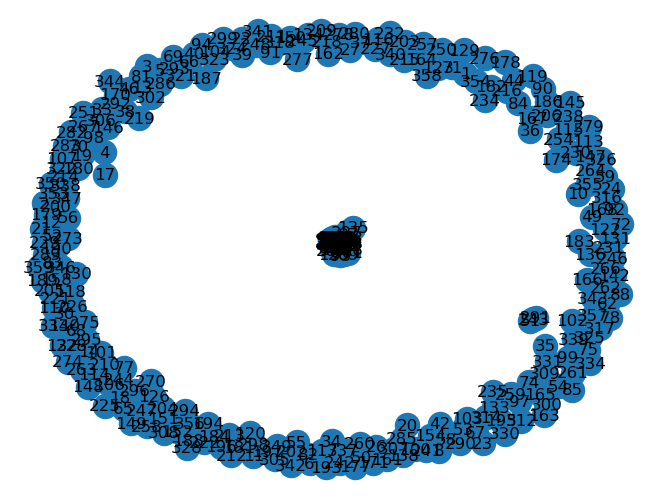

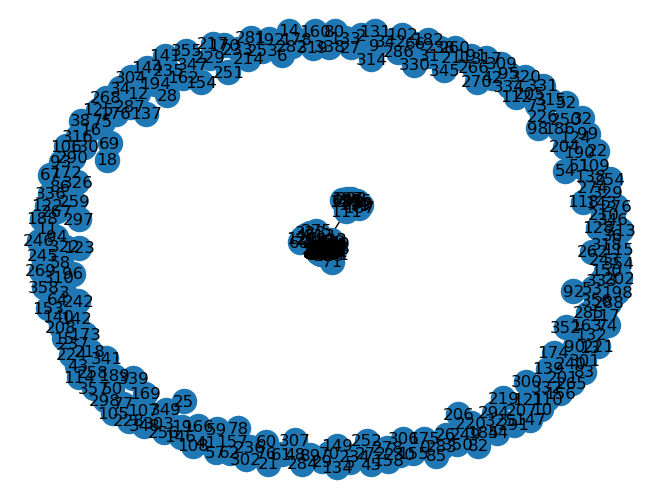

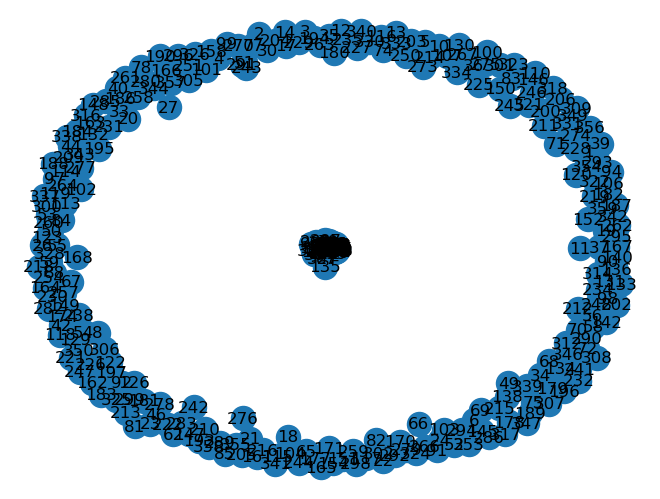

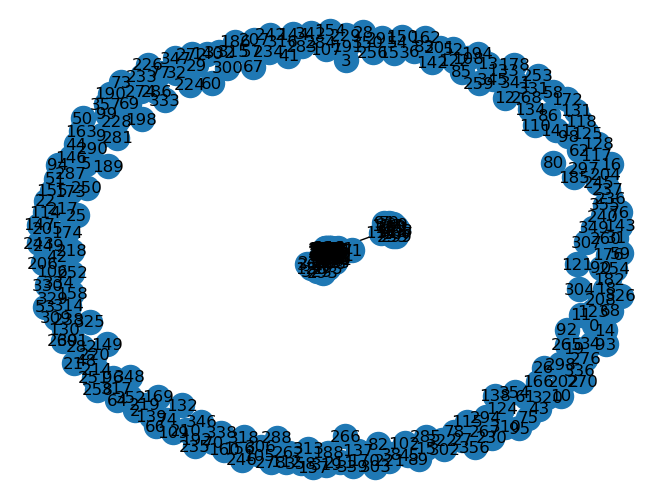

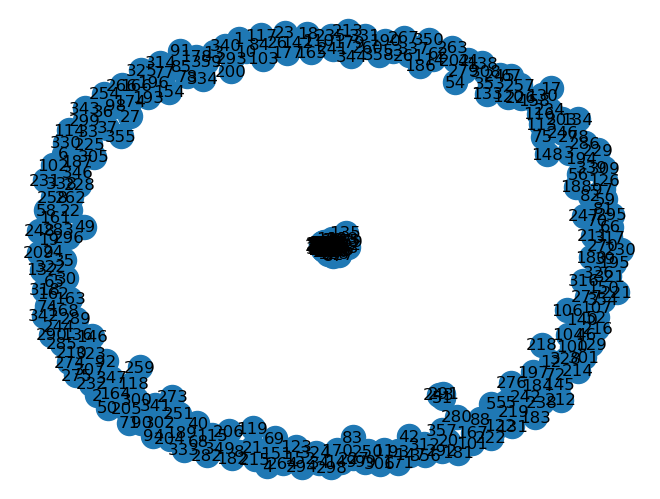

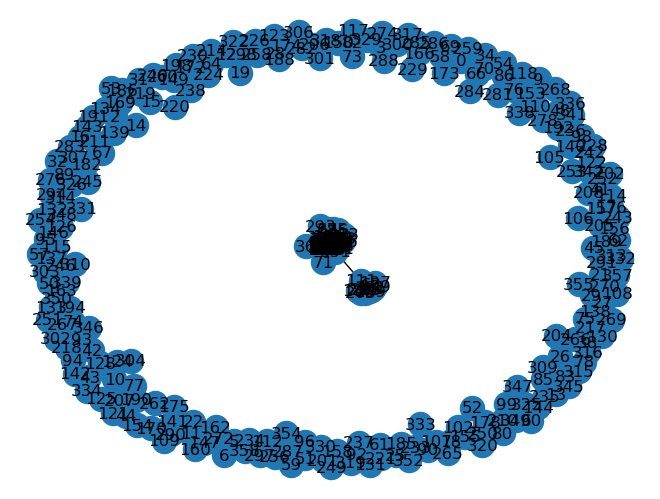

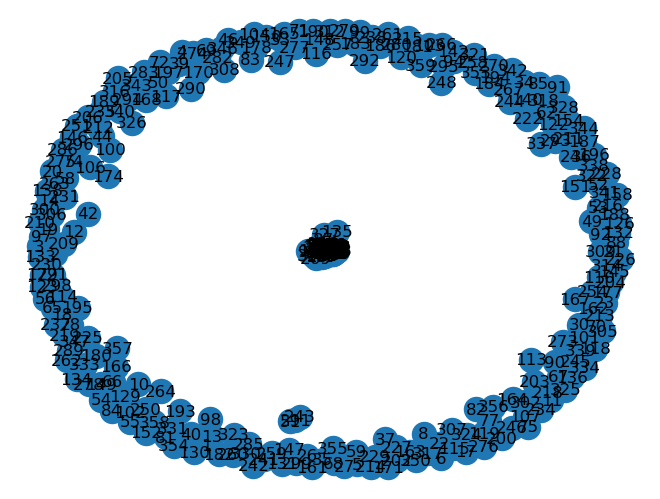

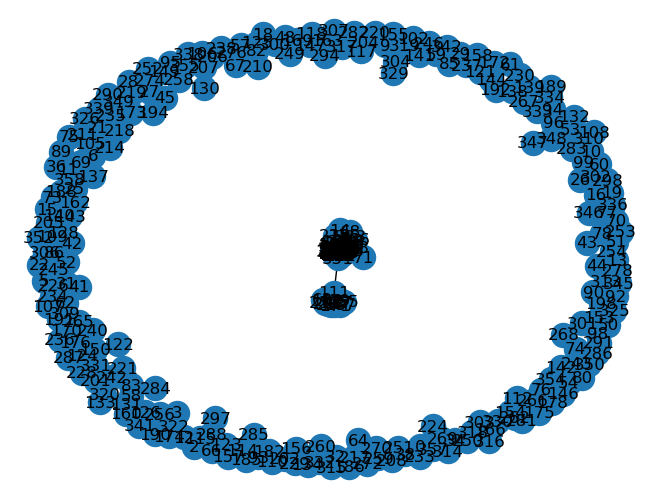

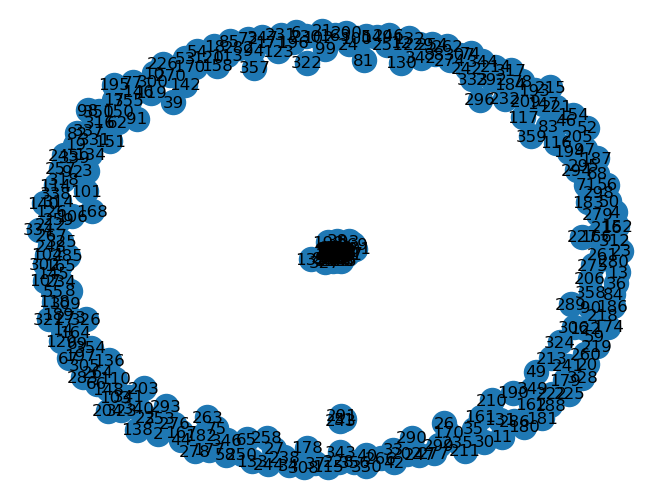

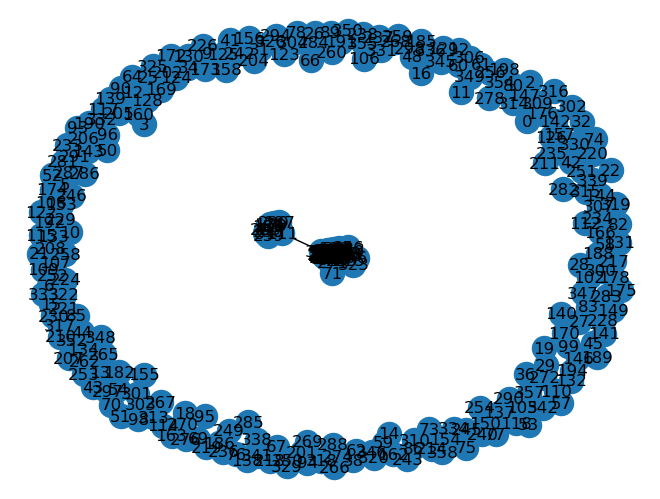

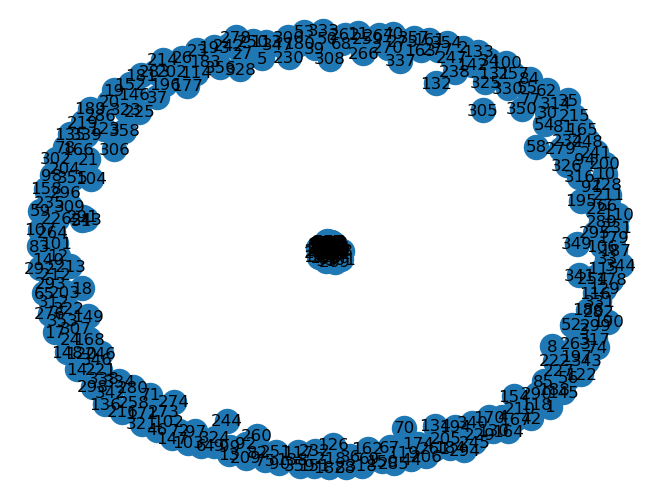

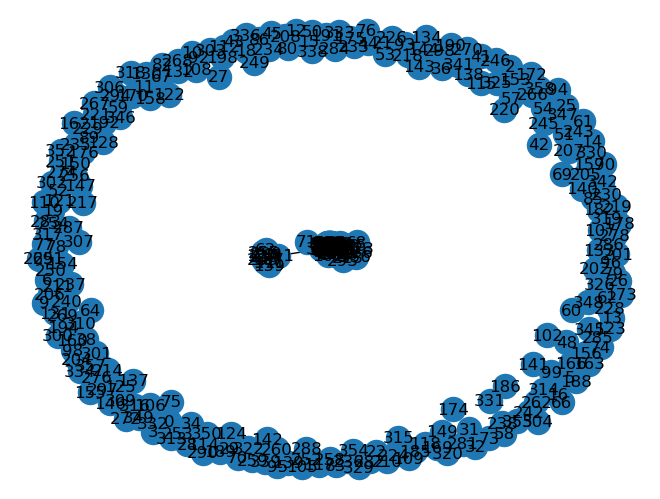

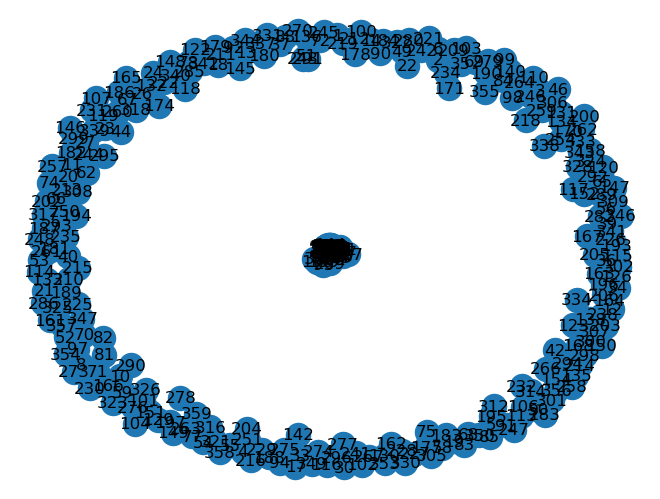

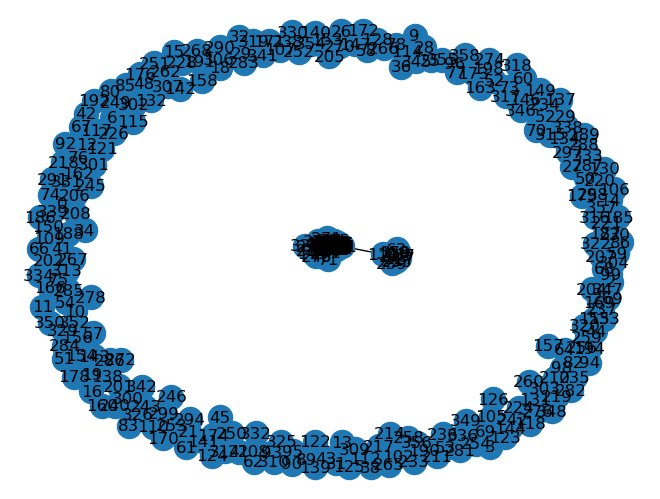

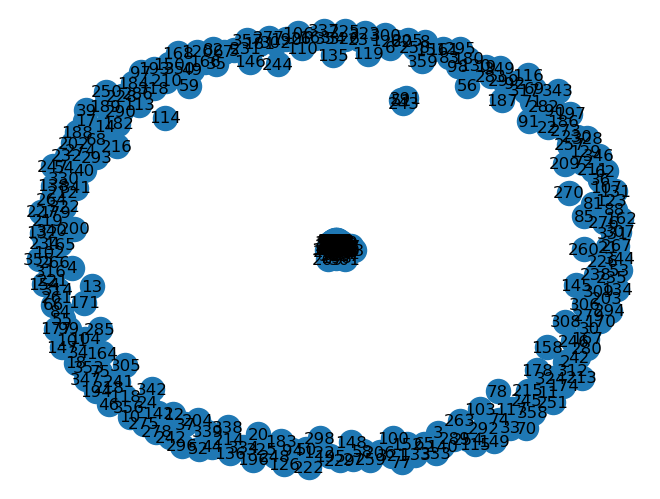

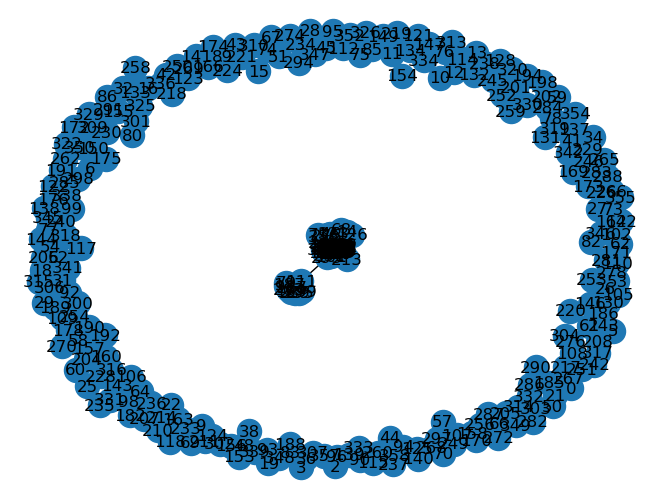

In [154]:
graphs = [threshold_fc_matrix(fc) for fc in sparse_adjacency[0].detach().numpy()]

# Visualize one graph using NetworkX
for i in graphs:
    G = create_networkx_graph(i)
    nx.draw(G, with_labels=True)
    plt.show()

## HCP graph-test from DGBSL

In [138]:
data_path = '../data/hcp/raw'
dataset = []
for file_name in os.listdir(data_path):
    if file_name.endswith(".npy"):
        file_path = os.path.join(data_path, file_name)
        time_series_data = np.load(file_path)[:, :490]
        label = int(os.path.basename(file_path).split('_')[-1].split('.')[0])
        fc_matrices = create_fc_matrices(time_series_data)
        graphs = [threshold_fc_matrix(fc) for fc in fc_matrices] 
        pyg_graphs = []  
        for g in graphs: 
            pyg_graphs.append(convert_to_pyg_graph(g, label))
        dataset.append(pyg_graphs)

In [139]:
len(dataset)

300

In [140]:
torch.manual_seed(12345)
all_graphs = [graph for subject in dataset for graph in subject]
train_dataset = all_graphs[:4000]
test_dataset = all_graphs[4000:]
train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=30, shuffle=False)

In [141]:
data = next(iter(train_loader))

In [142]:
data

DataBatch(x=[10800, 360], edge_index=[2, 96930], y=[30], batch=[10800], ptr=[31])

In [ ]:
#TODO capire quali sono le input feature

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(360, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 2)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

model = GCN(hidden_channels=64)

model = GCN(hidden_channels=64)
print(model)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         # print(data.edge_index)
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader)  # Derive ratio of correct predictions.


for epoch in range(1, 50):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')